In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
# set parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# training Data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# set model weights
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

print(X, X.get_shape())
print(Y, Y.get_shape())
print(W, W.get_shape())
print(b, b.get_shape())

Output("Placeholder:0", dtype=float32) <unknown>
Output("Placeholder_1:0", dtype=float32) <unknown>
Output("weight/read:0", shape=(), dtype=float32) ()
Output("bias/read:0", shape=(), dtype=float32) ()


In [5]:
# construct a linear model
pred = tf.add(tf.mul(X, W), b)
print(pred)

Output("Add:0", dtype=float32)


In [6]:
# mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
# initialize variables before run
init = tf.global_variables_initializer()

Epoch: 0050 cost=0.105492480 W=0.34410783648490906 b=0.1215377002954483
Epoch: 0100 cost=0.102195121 W=0.33848661184310913 b=0.16197636723518372
Epoch: 0150 cost=0.099278815 W=0.33319979906082153 b=0.20000982284545898
Epoch: 0200 cost=0.096699536 W=0.3282272219657898 b=0.23578132688999176
Epoch: 0250 cost=0.094418325 W=0.3235504627227783 b=0.26942574977874756
Epoch: 0300 cost=0.092400752 W=0.319151908159256 b=0.3010690212249756
Epoch: 0350 cost=0.090616435 W=0.31501495838165283 b=0.3308301270008087
Epoch: 0400 cost=0.089038432 W=0.31112396717071533 b=0.3588210940361023
Epoch: 0450 cost=0.087642819 W=0.30746448040008545 b=0.38514748215675354
Epoch: 0500 cost=0.086408600 W=0.3040226399898529 b=0.4099080264568329
Epoch: 0550 cost=0.085317165 W=0.3007855713367462 b=0.43319547176361084
Epoch: 0600 cost=0.084351920 W=0.2977408766746521 b=0.45509839057922363
Epoch: 0650 cost=0.083498307 W=0.2948772609233856 b=0.47569891810417175
Epoch: 0700 cost=0.082743481 W=0.29218408465385437 b=0.495073586

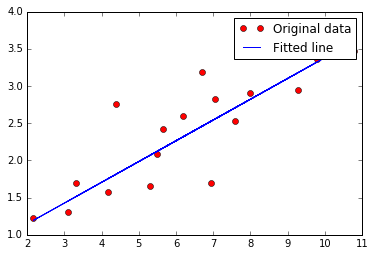

In [8]:
# launch the graph
with tf.Session() as sess:
    sess.run(init)

    # fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch: {0:04d} cost={1:.9f} W={2} b={3}" 
                  .format(epoch+1, c, sess.run(W), sess.run(b)))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost={0}" .format(c))
    
    # plot result
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()